In [1]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
!pip install JSAnimation

# Part 4a

In [3]:
# Create Shape 
# --> TODO: Need a way to make shape that is full-rank 
# --> skipping making it full-rank for now 

import numpy as np
pi = np.pi

# X, THETA , Z COLUMNS 
D_ARRAY = np.array([(0,1,0),
              (-1.5, -1,  pi/2,) , 
              (1.5, -1, -pi/2, )])
D_ARRAY




array([[ 0.        ,  1.        ,  0.        ],
       [-1.5       , -1.        ,  1.57079633],
       [ 1.5       , -1.        , -1.57079633]])

In [4]:
# Before Transformation

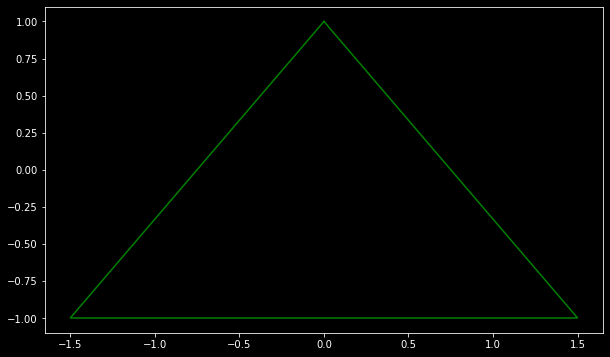

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import numpy

import scipy.integrate as integrate
import matplotlib.animation as animation


         
from JSAnimation import IPython_display    
from IPython.display import HTML

from matplotlib import pyplot as plt
from scipy.linalg import norm

fig, ax = plt.subplots()


# Plot D_array - x, y, alpha/theta : 


# Reference for understanding ax.plot 
#   : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html

# ax.plot(list(D_array[:,0]), list(list(D_array[:,1]) )) # Doesn't include the line first to last point

ax.plot(list(D_ARRAY[:,0]) + [list(D_ARRAY[:,0])[0]], list(list(D_ARRAY[:,1])) + [list(D_ARRAY[:,1])[0]],'g')


# has center of mass at 0,0

In [6]:
# A MATRIX 

In [7]:
# To Test rank / print only / comment this out later and use create_A_array(D_array)
''''''

x = list(D_ARRAY[:,0])
z = list(D_ARRAY[:,1])
a = list(D_ARRAY[:,2])

# direction vectors 
# TODO: in the future could implement this part to work for n rotors rather than hardcoding for 6 : 
fx_d = np.array([np.cos(a[0]),np.cos(a[1]), np.cos(a[2])])
fz_d = np.array([np.sin(a[0]),np.sin(a[1]), np.sin(a[2])])
t_d = np.array([x[0]*np.sin(a[0]) - np.cos(a[0])*z[0],
                x[1]*np.sin(a[1]) - np.cos(a[1])*z[1], 
                x[2]*np.sin(a[2]) - np.cos(a[2])*z[2]])

A = np.array([fx_d, fz_d, t_d])


rank = np.linalg.matrix_rank(A) # hOW TO ENSURE FULL RANK ?

# Going to continue with just rank = 3 for now because I do not know 
# A
print("Rank is", rank)
A

Rank is 3


array([[ 1.000000e+00,  6.123234e-17,  6.123234e-17],
       [ 0.000000e+00,  1.000000e+00, -1.000000e+00],
       [-1.000000e+00, -1.500000e+00, -1.500000e+00]])

# Part 4b

In [8]:
def simulate(delta_t, x, u): 
    # x = np.add(x, delta_t * u)
    x += delta_t * u
    return x 

In [9]:
# https://www.youtube.com/watch?v=wg9bI8-Qx2Q - Rotations in 3D

# Rotation in Y 
def rotate_y(th):
    rotY = [[np.cos(th), 0 , np.sin(th)], [0, 1, 0], [-np.sin(th), 0, np.cos(th)]]  
    return rotY


    
# th is theta for rotation 
# th = 0
# when th = 0 it is the identity matrix and means it is aligned 
# but how do we fine th ?
rotate_y(0)   

[[1.0, 0, 0.0], [0, 1, 0], [-0.0, 0, 1.0]]

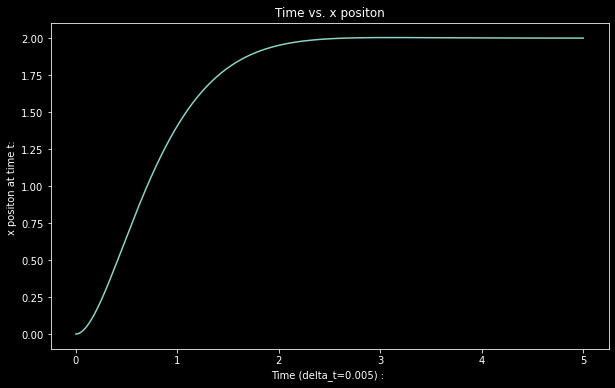

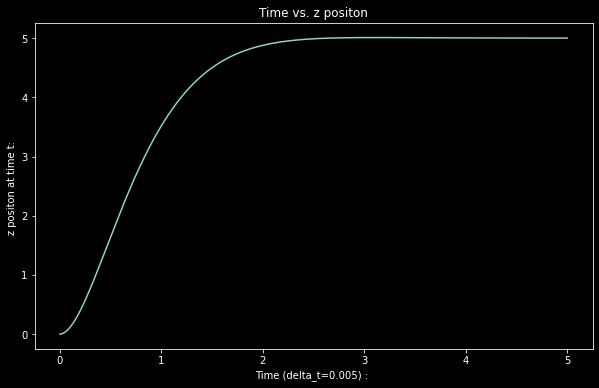

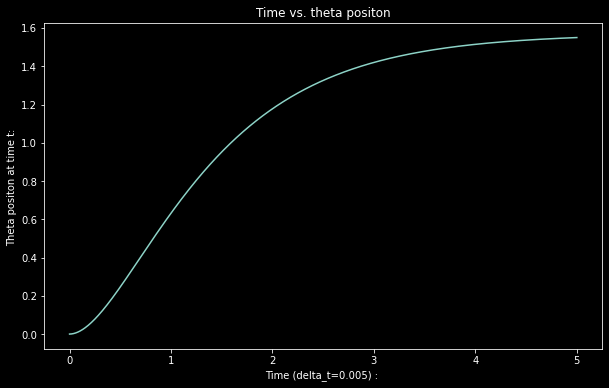

In [10]:


run_time  = 5
time_intervals = []
positions = []
u_values = []

delta_t = .005 # in seconds 
mass = 1 
Iy = 0.01
e3 = np.array([0,0,1]) # unit vector 
g = np.ndarray((3,), dtype=float, buffer=np.array([0.0, -9.81, 0]))
dx = np.array([0, 0, 0, 0., 0., 0.])

# gains 
kp_x = 5
kd_x = 4
kp_z= 5
kd_z = 4 
kp_th = 2
kd_th = 3 


x = sin
current_pose = np.array([0., 0., 0., 0., 0., 0.])
target = np.array([2, 5, np.pi/2, 0., 0., 0.])

t = 0
while t < run_time :
    
    ax = kp_x * (target[0] - current_pose [0]) + kd_x * (target[3] - current_pose [3])
    az = kp_z * (target[1] - current_pose [1]) + kd_z * (target[4] - current_pose [4])
    ath = kp_th * (target[2] - current_pose [2]) + kd_th * (target[5] - current_pose [5])
    
    w = [mass * ax, mass * az, Iy * ath]
    
    th = current_pose [2]
    # Still do not fully understand this B part of it 
    B = [[np.cos(th)/mass, np.sin(th)/mass, 0],
          [-np.sin(th)/mass, np.cos(th)/mass, 0],
          [0,0,1/Iy]]

    
    B = np.dot(B, A)
    iB = inv(B)
    u = np.dot(iB, (a + g))
    
    dx[:3] = current_pose[3:]
    dx[3:] = [ax, az, ath]
    current_pose = simulate(delta_t, current_pose , dx)
    
    positions.append(copy(current_pose))
    time_intervals.append(t)
    u_values.append(u)
    
    t = t + delta_t 
    

plt.title('Time vs. x positon')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('x positon at time t: ')

x = np.array(positions)
plt.plot(time_intervals,    x[:,0])


plt.show()
 


plt.title('Time vs. z positon')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('z positon at time t: ')

x = np.array(positions)
plt.plot(time_intervals,    x[:,1])


plt.show()
 

    
plt.title('Time vs. theta positon')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('Theta positon at time t: ')

x = np.array(positions)
plt.plot(time_intervals,    x[:,2])


plt.show()
 



In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
ax=plt.axes()

fig, ax = plt.subplots() 

def animate(t):
    ax.clear()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    
    x, z, th, vx, vz, vth = positions[t] 
    u = u_values[t]
    
    
    # Rotate 
    # https://www.youtube.com/watch?v=wg9bI8-Qx2Q
    R = rotate_y(th)
    
    points =  D_ARRAY[:,:2] 
    points = np.array([np.dot(R, [px, 0, pz]) for px, pz in points])
    pxs = points[:,0] + x
    pzs = points[:,2] + z
    th += 0


    # plotting propellers 
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.quiver.html
    # quiver([X, Y], U, V, [C], **kw)
    # U, V 1D or 2D array-like
    # They must have the same number of elements, matching the number of arrow locations. U and V may be masked
    ax.quiver(pxs, pzs, [.1,0,0], [0,-.1,.1], color="B") # what is the difference between this and the one below
    
  
    # plot Frame 
    ax.plot(list(pxs) + [pxs[0]], list(pzs) + [pzs[0]],'g')
    
    ax.plot(x, z, 'ro') # Center of mass
    
    
    
anim = animation.FuncAnimation(fig, animate, frames=len(time_intervals), interval=50)
HTML(anim.to_jshtml())

<ipython-input-11-743cb0087548>:37: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.quiver(pxs, pzs, [.1,0,0], [0,-.1,.1], color="B") # what is the difference between this and the one below


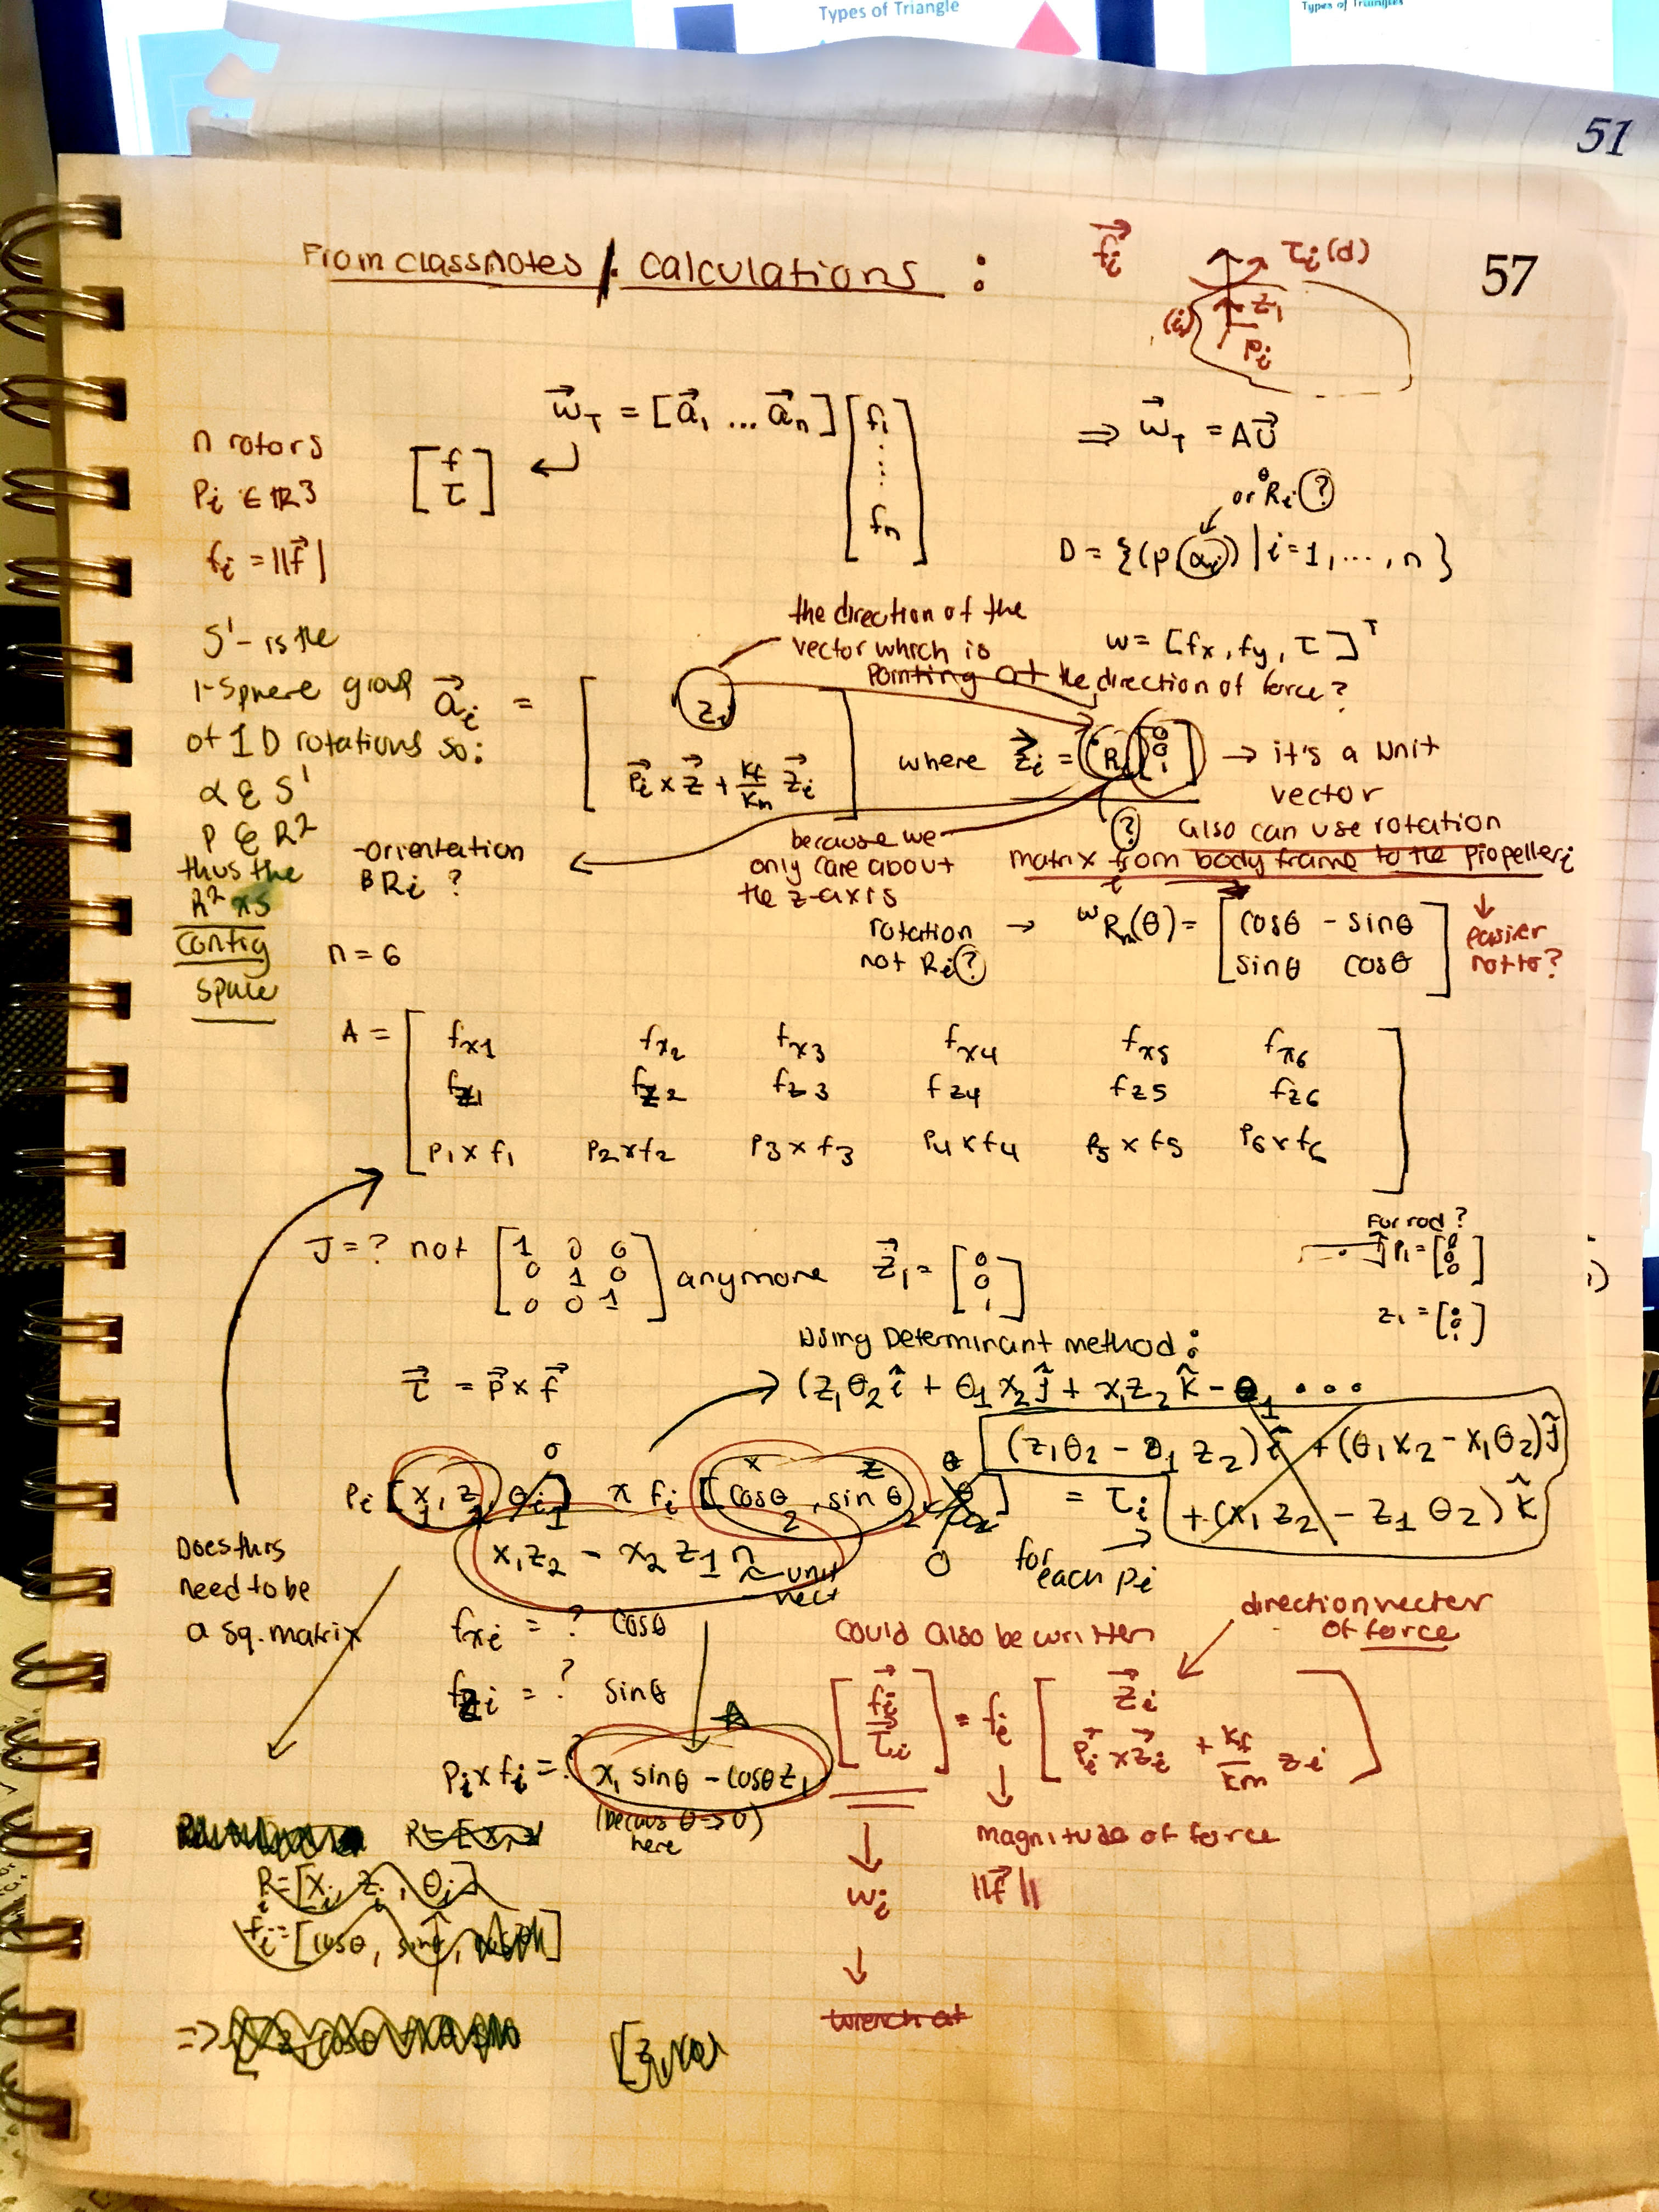

In [12]:
# TODO include the notes from class that you accummulated 
from IPython.display import Image
Image("img/picture.jpg")

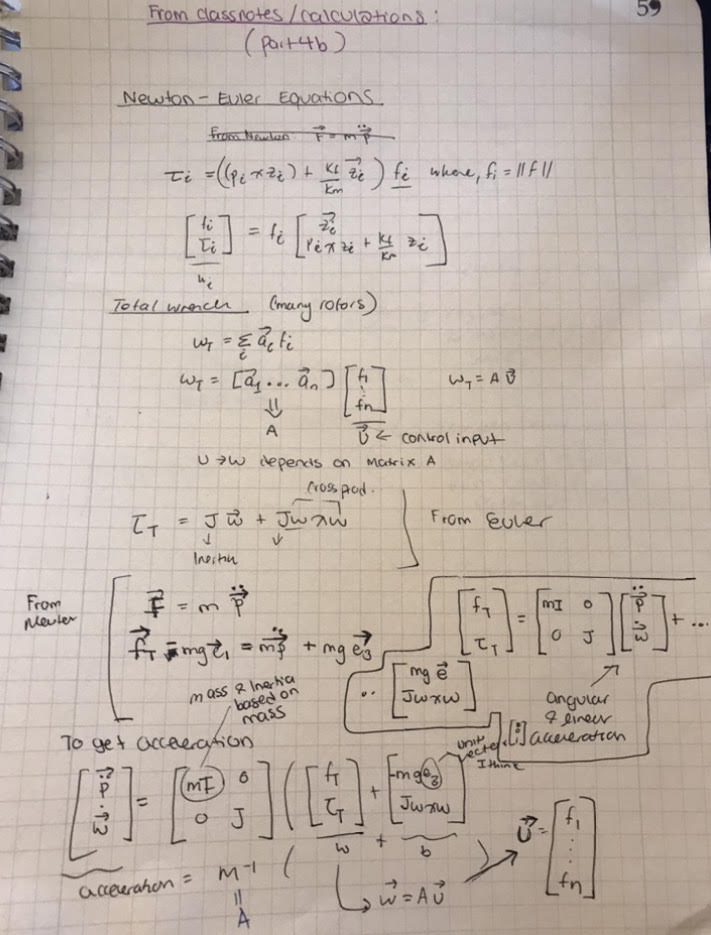

In [165]:
# TODO include the notes from class that you accummulated 
from IPython.display import Image
Image("img/partb.jpg")